In [1]:
from transformers import pipeline
classifier = pipeline("text-classification")

/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-10-28 14:57:52.756919: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 14:57:52.765278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730095072.776227   94891 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730095072.779508   94891 cuda_blas.cc

In [2]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [3]:
import pandas as pd
outputs = classifier(text)
print(pd.DataFrame(outputs))

      label     score
0  NEGATIVE  0.901547


### Named Entity Recognition(개체명 인식)
- 이름을 가진 개체(named entity)의 유형(entity_group) 인식하는 것(어떤 이름을 의미하는 단어를 보고 그 단어의 유형을 인식하는 것)
    - 유정 - 사람(person)
    - 2018년 - 시간(time)
    - 골드만삭스 - 조직(organization)

In [4]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
print(pd.DataFrame(outputs))

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is

  entity_group     score           word  start  end
0          ORG  0.879010         Amazon      5   11
1         MISC  0.990859  Optimus Prime     36   49
2          LOC  0.999755        Germany     90   97
3         MISC  0.556569           Mega    208  212
4          PER  0.590258         ##tron    212  216
5          ORG  0.669692         Decept    253  259
6         MISC  0.498350        ##icons    259  264
7         MISC  0.775361       Megatron    350  358
8         MISC  0.987854  Optimus Prime    367  380
9          PER  0.812096      Bumblebee    502  511


## Question Answering(질의 응답)
- 사용자로부터 받은 특정한 종류의 정보에 대한 질문을 자연어로 받아들여 해답을 제공하는 것

In [5]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
print(pd.DataFrame([outputs]))

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


      score  start  end                   answer
0  0.631292    335  358  an exchange of Megatron


## Summarizer
- 긴 문서나 텍스트에서 핵심적인 내용을 간결하게 요약하는 것

In [6]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your min_length=56 must be inferior than your max_length=45.
/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/generation/utils.py:1244: UserWarning: Unfeasible length c

 Bumblebee ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead.


## Translator

In [7]:
translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt. Eingeschlossen sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, von Ihnen bald zu hören. Aufrichtig, Bumblebee.


## Generator

In [8]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Dear Amazon, last week I ordered an Optimus Prime action figure
from your online store in Germany. Unfortunately, when I opened the package,
I discovered to my horror that I had been sent an action figure of Megatron
instead! As a lifelong enemy of the Decepticons, I hope you can understand my
dilemma. To resolve the issue, I demand an exchange of Megatron for the
Optimus Prime figure I ordered. Enclosed are copies of my records concerning
this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I'm sorry to say, however, that our staff was

out of communication with you as soon as your order was made, and that your order was unclaimed, especially because we were unaware

that a shipment was returned due to postage fees, or that we received items mailed


## 허깅페이스 생태계
- 라이브러리 집합
- 허브

## 1. Text Classification
- Task: Sentiment analysis of a tweet
    - Labels: Anger, Disgust, Fear, Joy, Sadness, Surprise
- Model: DistillBERT
- Required Packages: datasets, pandas, transformers, torch, accelerate, numpy, scikit-learn

### 1) Load dataset

In [84]:
from datasets import load_dataset ## Hugging Face Datasets

## Load Dataset from Hugging Face Datasets
emotions = load_dataset("emotion")
# emotions = load_dataset("csv", data_files = "my_file.csv")

print(emotions)

train_ds = emotions["train"] ## Dataset class, which acts like np.array or list.
print(train_ds)
print(len(train_ds))
print(train_ds[0])
print(train_ds.features)
print(train_ds["text"][:5])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})
Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})
16000
{'text': 'i didnt feel humiliated', 'label': 0}
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}
['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


### 2) Datasets to Pandas DataFrame

In [85]:
import pandas as pd
emotions.set_format(type="pandas")
emotions["train"] = emotions["train"].select(range(1600))
emotions["validation"] = emotions["validation"].select(range(200))
emotions["test"] = emotions["test"].select(range(200))
df = emotions["train"][:]

# print(df.head())

def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
print(df.head())
print(df["label_name"].value_counts(ascending=True))

                                                                                                           text  label label_name
0                                                                                       i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake      0    sadness
2                                                              im grabbing a minute to post i feel greedy wrong      3      anger
3                  i am ever feeling nostalgic about the fireplace i will know that it is still on the property      2       love
4                                                                                          i am feeling grouchy      3      anger
label_name
surprise     61
love        144
fear        186
anger       221
sadness     421
joy         567
Name: count, dtype: int64


### 3) Text to tokens, test

In [86]:
## Text to tokens
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
print(tokenizer.vocab_size, tokenizer.model_max_length)

# Test
text = "Tokenizing text is a core task of NLP."
encoded_text = tokenizer(text)
print(encoded_text)

tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
print(tokenizer.convert_tokens_to_string(tokens))

30522 512
{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']
[CLS] tokenizing text is a core task of nlp. [SEP]


/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### 4) Text to tokens, all data

In [87]:
## Tokenizing all data
def tokenize(batch):
    tokens = tokenizer(batch["text"].tolist(), padding=True, truncation=True)
    tokens["label"] = batch["label"]
    return tokens

# test
print(tokenize(emotions["train"][:2])) ## 0 means [PAD].

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
# batched=True -> map for each sample, batch_size=None -> map all data at once without batch

print(emotions_encoded["train"].column_names) # ['label', 'input_ids', 'attention_mask']

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], 'label': 0    0
1    0
Name: label, dtype: int64}
['label', 'input_ids', 'attention_mask']


### 5) Train our text classifier
- Method 1. Use pretrained model for feature extraction, and train linear classifier only.

In [88]:
## Train text classifier: 1. Transfomer for feature extraction, Just train linear classifier
from transformers import AutoModel
# TFAutoModel: TFAutoModel.from_pretrained(model_ckpt, from_pt=True)
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # torch.device("cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

# test
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(inputs["input_ids"].size()) # batch_size * n_tokens

inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(input_ids = inputs["input_ids"], attention_mask = inputs["attention_mask"])

print(outputs)
print(outputs.last_hidden_state.size()) # batch_size * n_tokens * hidden_dimension
outputs.last_hidden_state[:, 0] # Use hidden state associated with [CLS] token as input feature

torch.Size([1, 6])
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)
torch.Size([1, 6, 768])


tensor([[-1.5651e-01, -1.8620e-01,  5.2777e-02, -1.0634e-01, -1.3163e-02,
         -2.6944e-01,  9.2270e-02,  1.5865e-01, -9.8675e-02, -2.9572e-01,
         -1.3788e-01, -3.8061e-02, -5.3617e-02,  1.3045e-01,  3.9713e-02,
          8.6893e-02,  2.5087e-02,  8.6177e-03,  2.5243e-01, -1.3678e-01,
         -1.2137e-01, -1.3896e-01, -1.3426e-01, -9.0844e-02,  3.0509e-02,
         -3.8619e-02,  1.1485e-01, -5.7996e-02,  1.0131e-01,  9.7920e-02,
          3.8743e-03,  1.1950e-01, -6.6339e-02, -2.1257e-02,  1.3090e-01,
          2.6520e-02,  2.3624e-01,  5.0220e-02,  1.3503e-02, -2.1380e-02,
         -8.8323e-02, -9.8360e-02,  2.2675e-01, -2.4940e-02, -1.6261e-01,
         -8.3787e-02, -1.9629e+00, -1.4541e-01, -1.5582e-01, -3.5487e-01,
         -4.5971e-02,  2.0034e-01,  1.3080e-02,  4.9650e-01,  1.0587e-01,
          1.2080e-01, -1.9118e-01,  3.8280e-01,  1.7121e-02, -1.6628e-02,
          2.1525e-01,  4.4381e-02,  3.9333e-03,  3.5416e-02,  1.2238e-01,
          2.1459e-01,  1.5015e-02,  2.

In [89]:
## Feature extraction for the whole dataset
def extract_hidden_states(batch):
    inputs = {k:v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        last_hidden_state = model(input_ids = inputs["input_ids"], attention_mask = 
                                  inputs["attention_mask"]).last_hidden_state
    return {"hidden_state": last_hidden_state[:, 0].cpu().numpy()}

emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True, batch_size=None)

                                             ## If you are running out of memory, set batch_size.
print(emotions_hidden["train"].column_names) ## ['label', 'input_ids', 'attention_mask', 'hidden_state']

['label', 'input_ids', 'attention_mask', 'hidden_state']


In [90]:
# Make feature matrix
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(X_train.shape, X_valid.shape)

## Train a simple classifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)
print(lr_clf.score(X_valid, y_valid))

dummy_clf = DummyClassifier(strategy="most_frequent") # “uniform” for random guess
dummy_clf.fit(X_train, y_train)
print(dummy_clf.score(X_valid, y_valid))

(1600, 768) (200, 768)
0.58
0.29


### 5) Train our text classifier
- Method 2. Fine-tuning the pretrained model + linear classifier

In [91]:
# 2. fine tuning Transformer
from transformers import AutoModelForSequenceClassification
import torch

num_labels = 6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # torch.device("cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = "weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [92]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned_emotion"

# Setting for training
training_args = TrainingArguments(output_dir=model_name,
                                    num_train_epochs=5,
                                    learning_rate=1e-4,
                                    lr_scheduler_type="constant",
                                    per_device_train_batch_size=batch_size,
                                    per_device_eval_batch_size=batch_size,
                                    weight_decay=0.01,
                                    evaluation_strategy="epoch",
                                    disable_tqdm=False,
                                    logging_steps=logging_steps,
                                    push_to_hub=False,
                                    save_strategy="epoch",
                                    load_best_model_at_end=True,
                                    log_level="error")

/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [93]:
trainer = Trainer(model=model, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=emotions_encoded["train"],
                    eval_dataset=emotions_encoded["validation"],
                    tokenizer=tokenizer)

trainer.train()

preds_output = trainer.predict(emotions_encoded["validation"])
print(preds_output.metrics)

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.441500,1.012625,0.650000,0.576465
2,0.727500,0.478690,0.865000,0.856964
3,0.272700,0.376461,0.880000,0.881147
4,0.125000,0.407622,0.895000,0.896877
5,0.079500,0.386459,0.900000,0.901289


{'test_loss': 0.37646058201789856, 'test_accuracy': 0.88, 'test_f1': 0.8811465369666294, 'test_runtime': 0.2043, 'test_samples_per_second': 978.787, 'test_steps_per_second': 19.576}


### 6) Error analysis

In [95]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Move input tensors to the appropriate device
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])

    # Predict label and calculate loss
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

    # Return results as numpy arrays for compatibility with dataset
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [96]:
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label,
                                                                    batched=True, batch_size=16)

emotions_encoded.set_format("pandas")

cols = ["label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_int2str)

# Set all columns and rows to not be truncated
pd.set_option('display.max_columns', None) # Print all rows
pd.set_option('display.max_rows', None) # Print all columns
pd.set_option('display.expand_frame_repr', False) # Print without scrolling sideways
pd.set_option('display.max_colwidth', None) # Print all long strings

print(df_test.sort_values("loss", ascending=False).head(10)) # Top 10 test data with the largest errors
print(df_test.sort_values("loss", ascending=True).head(10)) # Top 10 test data with the smallest errors

Map: 100%|████████████████████████████| 200/200 [00:00<00:00, 906.25 examples/s]

       label predicted_label      loss
145     love           anger  5.728366
177  sadness             joy  4.759254
18      love            fear  4.544511
95       joy         sadness  3.826369
198     fear           anger  3.814859
27       joy            love  3.682483
195      joy         sadness  3.650350
118    anger        surprise  3.161116
17     anger         sadness  3.045929
194      joy        surprise  2.992537
       label predicted_label      loss
26   sadness         sadness  0.013466
112  sadness         sadness  0.013773
159  sadness         sadness  0.014178
189  sadness         sadness  0.014795
0    sadness         sadness  0.015209
130  sadness         sadness  0.015692
29   sadness         sadness  0.016155
113  sadness         sadness  0.016652
141  sadness         sadness  0.016831
49   sadness         sadness  0.016923


## 2. Multilingual Named-Entity Recognition
- Task: Named-Entity Recognition (NER)
    - NER은 텍스트에서 사람, 조직, 위치와 같은 개체를 식별하는 일반적인 NLP 과제
    - e.g., Jeff Dean은 캘리포니아에 있는 Google의 컴퓨터 과학자입니다.
        - Jeff: B-PER(Benign Person: 사람 이름의 시작 부분)
        - Dean: I-PER(Inside Person: 사람 이름의 나머지 부분)
        - Google: B-ORG(Benign Organization: 조직 이름)
        - California: B-LOC(Benign Location: 조직 위치)
    - Multilingual model(다국어 모델: 여러 언어를 처리하는 모델)을 사용하여 NER 수행
- Model: XLM-RoBERTa
- Required Packages: datasets, pandas, seqeval
- Model architecture for NER(Token classification)
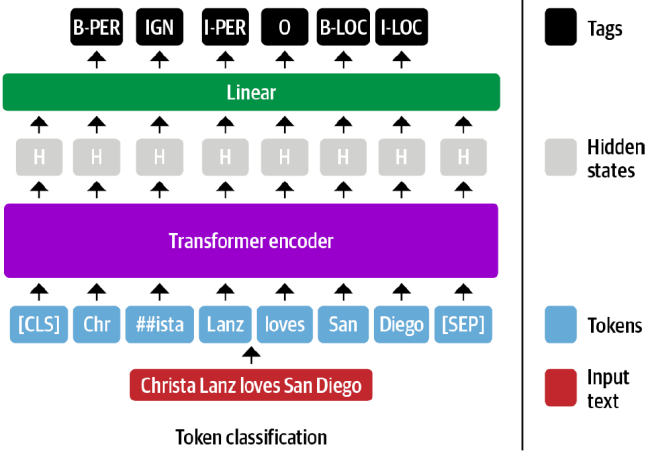

### Multilingual LLM
- 기존에는 영어 말뭉치(corpus)에서 NLP 작업을 해결하기 위해 트랜스포머를 적용했음
- 그러나 문서가 한국어, 프랑스어, 그리스어로 작성되어 있다면 어떻게 해야할까?

### Approach 1
- Hugging Face Hub에서 적합한 사전 학습된 LLM을 찾아 해당 작업에 맞게 파인 튜닝(fine-tune)하여 사용
- 그러나 사전 학습된 LLM은 독일어, 러시아어, 중국어와 같은 "고자원" 언어에만 주로 존재하는 경향이 있음

### Approach 2
- 다국어 LLM은 100개 이상의 언어 텍스트에 대해 공동으로 사전 학습(pretrain)됨
- 이러한 모델은 제로샷 교차 언어 전이(zero-shot cross-lingual transfer)를 가능하게 하며, 이는 한 언어에서 파인 튜닝된 모델이 추가 학습 없이 다른 언어에도 적용될 수 있음을 의미함
    - Zero-shot: 모델이 한 번도 본 적 없는 작업에 대해 학습 없이 바로 수행하는 것
        - 모델이 '동물 분류'에 대해서만 학습했는데, '식물 분류' 작업을 처음 접하면서도 어느 정도 정확하게 분류할 수 있다면 Zero-shot
    - Few-shot: 모델이 새로운 작업에 대해 아주 적은 데이터로 학습한 후 이를 수행하는 것
        - 고양이 사진 분류'에 대해서 2-3개의 예시 사진만 보여주고 학습을 시작했는데도, 모델이 잘 분류할 수 있다면 Few-shot
    - Zero-shot cross-lingual transfer: 어떤 언어로 학습한 모델이 다른 언어로 바로 적용되는 것
        - e.g., 독일어 텍스트에 대해서만 학습한 모델이 프랑스어, 이탈리어 텍스트에서도 잘 작동하면 zero-shot cross-lingual transfer
- 이번 실습에서는 독일어 하위 집합에서 기본 모델을 파인 튜닝한 후, 프랑스어, 이탈리아어, 영어에서의 제로샷 교차 언어 성능을 평가함

### 1) Load dataset

In [97]:
from datasets import load_dataset
from collections import defaultdict
from datasets import DatasetDict

langs = ["de", "fr", "it", "en"]
fracs = [0.629, 0.229, 0.084, 0.059]

panx_ch = defaultdict(DatasetDict)
for lang, frac in zip(langs, fracs):
    # Load monolingual corpus
    ds = load_dataset("xtreme", name=f"PAN-X.{lang}")
    # Shuffle and downsample each split according to spoken proportion
    for split in ds:
        panx_ch[lang][split] = (
            ds[split]
            .shuffle(seed=0)
            .select(range(int(frac * ds[split].num_rows) // 10)))

Generating train split: 100%|█| 20000/20000 [00:00<00:00, 1170596.00 examples/s]
Generating validation split: 100%|█| 10000/10000 [00:00<00:00, 1236674.14 exampl
Generating train split: 100%|█| 20000/20000 [00:00<00:00, 1657467.35 examples/s]
Generating validation split: 100%|█| 10000/10000 [00:00<00:00, 1547485.24 exampl
Generating train split: 100%|█| 20000/20000 [00:00<00:00, 1538460.18 examples/s]
Generating validation split: 100%|█| 10000/10000 [00:00<00:00, 1239634.70 exampl
Generating train split: 100%|██| 20000/20000 [00:00<00:00, 784465.93 examples/s]
Generating validation split: 100%|█| 10000/10000 [00:00<00:00, 1459497.53 exampl
Generating test split: 100%|██| 10000/10000 [00:00<00:00, 1512169.30 examples/s]


In [102]:
import pandas as pd
# Number of training examples for each language
print(pd.DataFrame({lang: [panx_ch[lang]["train"].num_rows] for lang in langs}, index=["Number of training examples"]))
                                                                                       
# test
element = panx_ch["de"]["train"][0]
for key, value in element.items():
    print(f"{key}: {value}")
                                                                                       
# Class labels
tags = panx_ch["de"]["train"].features["ner_tags"].feature
print(tags)

# map integer labels to str labels
def create_tag_names(batch):
    return {"ner_tags_str": [tags.int2str(idx) for idx in batch["ner_tags"]]}
panx_de = panx_ch["de"].map(create_tag_names)

# test: check labels for an instance
de_example = panx_de["train"][0]
pd.set_option('display.max_columns', None) # Print all columns
print(pd.DataFrame(data=[de_example["tokens"], de_example["ner_tags_str"]], index=['Tokens', 'Tags']))

                               de   fr   it   en
Number of training examples  1258  458  168  118
tokens: ['2.000', 'Einwohnern', 'an', 'der', 'Danziger', 'Bucht', 'in', 'der', 'polnischen', 'Woiwodschaft', 'Pommern', '.']
ner_tags: [0, 0, 0, 0, 5, 6, 0, 0, 5, 5, 6, 0]
langs: ['de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de', 'de']
ClassLabel(names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC'], id=None)


Map: 100%|██████████████████████████| 629/629 [00:00<00:00, 13407.76 examples/s]

           0           1   2    3         4      5   6    7           8             9        10 11
Tokens  2.000  Einwohnern  an  der  Danziger  Bucht  in  der  polnischen  Woiwodschaft  Pommern  .
Tags        O           O   O    O     B-LOC  I-LOC   O    O       B-LOC         B-LOC    I-LOC  O


### 2) Load pre-trained model

In [103]:
## Configuration
from transformers import XLMRobertaForTokenClassification
xlmr_model_name = "xlm-roberta-base"
index2tag = {idx: tag for idx, tag in enumerate(tags.names)}
tag2index = {tag: idx for idx, tag in enumerate(tags.names)}

from transformers import AutoConfig
xlmr_config = AutoConfig.from_pretrained(xlmr_model_name,
                                            num_labels=tags.num_classes,
                                            id2label=index2tag, label2id=tag2index)

# Load pretrained model
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # torch.device("cpu")
xlmr_model = ((XLMRobertaForTokenClassification
                .from_pretrained(xlmr_model_name, config=xlmr_config))
                .to(device))

### 3) Tokenize
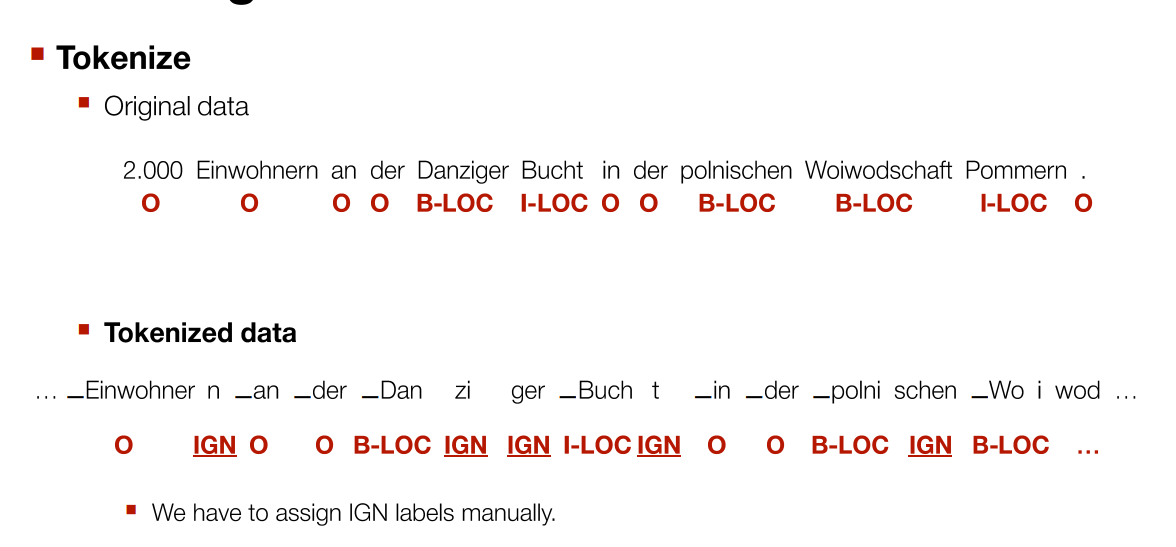

- Original data:
    - 원본 데이터에는 문장 단위로 개체명(예: 지명, 인명 등)이 포함된 텍스트가 있고, 각 단어마다 NER 라벨이 지정됨
    - 여기서는 "Danziger Bucht", "Woiwodschaft Pommern"과 같은 지명이 포함되어 있으며, 각각 B-LOC, I-LOC와 같은 라벨이 할당되어 있음
    - O: 개체명이 아닌 일반 단어
    - B-LOC: 지명(Location) 시작 부분
    - I-LOC: 지명 중간 또는 끝 부분

- Tokenized data:
    - 원본 데이터를 토큰화하면 단어가 분할되어 더 작은 단위로 나뉘게 됨
    - 예를 들어, "Danziger"는 "_Dan", "zi", "ger"로 분리될 수 있음
    - 각 분리된 토큰에도 적절한 라벨을 할당해야 하는데, 토큰화 과정에서 추가된 토큰에는 IGN이라는 무시(Ignore) 라벨을 수동으로 할당함
    - IGN 라벨은 모델이 학습할 때 무시하도록 하는 라벨로, 개체명이 아닌 불필요한 토큰에 할당함

In [104]:
from transformers import AutoTokenizer
xlmr_tokenizer = AutoTokenizer.from_pretrained(xlmr_model_name)

def tokenize_and_align_labels(examples):
    tokenized_inputs = xlmr_tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)
    labels = []
    
    for idx, label in enumerate(examples["ner_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=idx)
        previous_word_idx = None
        label_ids = []

        for word_idx in word_ids:
            if word_idx is None or word_idx == previous_word_idx:
                label_ids.append(-100)
            else:
                label_ids.append(label[word_idx])     
            previous_word_idx = word_idx
            
        labels.append(label_ids)    
    tokenized_inputs["labels"] = labels
    return tokenized_inputs

def encode_panx_dataset(corpus):
    return corpus.map(tokenize_and_align_labels, batched=True, remove_columns=['langs', 'ner_tags', 'tokens'])

panx_de_encoded = encode_panx_dataset(panx_ch["de"])

/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Map: 100%|██████████████████████████| 629/629 [00:00<00:00, 13059.90 examples/s]


### 4) Performance Measures
    - NER evaluation: Accuracy (Precision, Recall, F1)
    - 몇몇 라이브러리는 NER 성능 평가를 제공함

In [107]:
from seqeval.metrics import classification_report
y_true = [["O", "O", "O", "B-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
y_pred = [["O", "O", "B-MISC", "I-MISC", "I-MISC", "I-MISC", "O"], ["B-PER", "I-PER", "O"]]
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

        MISC       0.00      0.00      0.00         1
         PER       1.00      1.00      1.00         1

   micro avg       0.50      0.50      0.50         2
   macro avg       0.50      0.50      0.50         2
weighted avg       0.50      0.50      0.50         2



In [110]:
import numpy as np

def align_predictions(predictions, label_ids):
    preds = np.argmax(predictions, axis=2)
    batch_size, seq_len = preds.shape
    labels_list, preds_list = [], []
    for batch_idx in range(batch_size):
        example_labels, example_preds = [], []
        for seq_idx in range(seq_len):
            # Ignore label IDs = -100
            if label_ids[batch_idx, seq_idx] != -100:
                example_labels.append(index2tag[label_ids[batch_idx][seq_idx]])
                example_preds.append(index2tag[preds[batch_idx][seq_idx]])

        labels_list.append(example_labels)
        preds_list.append(example_preds)
        
    return preds_list, labels_list

### 5) Fine-tuning XLM-RoBERTa

In [111]:
## Fine-tuning pretrained model
# Training Arguments
from transformers import TrainingArguments

num_epochs = 3
batch_size = 24
logging_steps = len(panx_de_encoded["train"]) // batch_size
model_name = f"{xlmr_model_name}-finetuned-panx-de"
training_args = TrainingArguments(
    output_dir=model_name, log_level="error", num_train_epochs=num_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size, evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=False, fp16=True)

/home/viplab/anaconda3/envs/deepfake/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [112]:
# Metrics
from seqeval.metrics import f1_score

def compute_metrics(eval_pred):
    y_pred, y_true = align_predictions(eval_pred.predictions, eval_pred.label_ids)
    return {"f1": f1_score(y_true, y_pred)}

# Padding for labels
from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(xlmr_tokenizer)

In [113]:
# Train the model
def model_init():
    return (XLMRobertaForTokenClassification
        .from_pretrained(xlmr_model_name, config=xlmr_config)
        .to(device))

from transformers import Trainer
trainer = Trainer(model_init=model_init, args=training_args,
                data_collator=data_collator, compute_metrics=compute_metrics,
                train_dataset=panx_de_encoded["train"],
                eval_dataset=panx_de_encoded["validation"],
                tokenizer=xlmr_tokenizer)

trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.773600,0.347566,0.581040
2,0.271800,0.214865,0.738691
3,0.162700,0.195095,0.775109


TrainOutput(global_step=159, training_loss=0.4005824638612615, metrics={'train_runtime': 26.8604, 'train_samples_per_second': 140.504, 'train_steps_per_second': 5.919, 'total_flos': 88863286574568.0, 'train_loss': 0.4005824638612615, 'epoch': 3.0})

### 6) Corss-lingual transfer performance
- Trained on Germany
- Tested on Franch, Italian, and English

In [114]:
## Cross-lingual Transfer Performance
def get_f1_score(trainer, dataset):
    return trainer.predict(dataset).metrics["test_f1"]

# 1. de to de
f1_scores = defaultdict(dict)
f1_scores["de"]["de"] = get_f1_score(trainer, panx_de_encoded["test"])
print(f"F1-score of [de] model on [de] dataset: {f1_scores['de']['de']:.3f}")

F1-score of [de] model on [de] dataset: 0.784


In [116]:
# 2. de to others
def evaluate_lang_performance(lang, trainer):
    panx_ds = encode_panx_dataset(panx_ch[lang])
    return get_f1_score(trainer, panx_ds["test"])

f1_scores["de"]["fr"] = evaluate_lang_performance("fr", trainer)
print(f"F1-score of [de] model on [fr] dataset: {f1_scores['de']['fr']:.3f}")

f1_scores["de"]["it"] = evaluate_lang_performance("it", trainer)
print(f"F1-score of [de] model on [it] dataset: {f1_scores['de']['it']:.3f}")

f1_scores["de"]["en"] = evaluate_lang_performance("en", trainer)
print(f"F1-score of [de] model on [en] dataset: {f1_scores['de']['en']:.3f}")

Map: 100%|██████████████████████████| 229/229 [00:00<00:00, 12941.20 examples/s]


F1-score of [de] model on [fr] dataset: 0.604


Map: 100%|█████████████████████████████| 84/84 [00:00<00:00, 9194.19 examples/s]


F1-score of [de] model on [it] dataset: 0.678


Map: 100%|█████████████████████████████| 59/59 [00:00<00:00, 7628.83 examples/s]


F1-score of [de] model on [en] dataset: 0.598
